<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_comparativas/kmeans_vs_Jerarquia_Raiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs


n_samples = 2000
centers = [(1, 1), (6, 6),(12,12)]
random_state = 180

# Clusteres normales:
X, y = make_blobs(n_samples=n_samples, centers=centers,random_state=random_state)

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

Text(0.5, 1.0, 'Anisotropically Distributed clusters')

<Figure size 1080x1080 with 0 Axes>

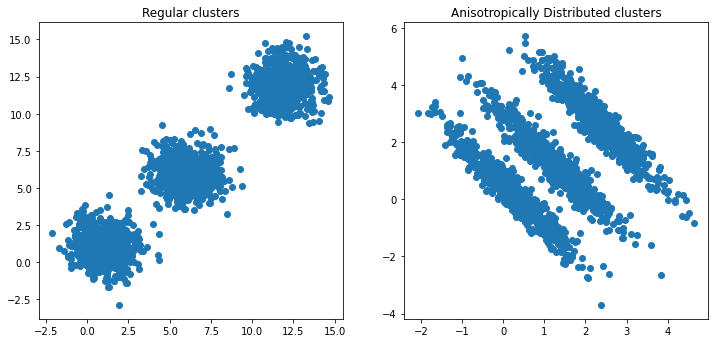

In [2]:
plt.figure(figsize=(15, 15))


plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Regular clusters")

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1])
plt.title("Anisotropically Distributed clusters")

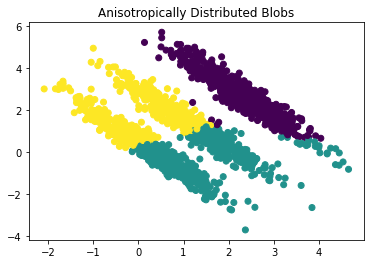

In [3]:
from sklearn.cluster import KMeans
y = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
plt.title("Anisotropically Distributed Blobs")
plt.show()



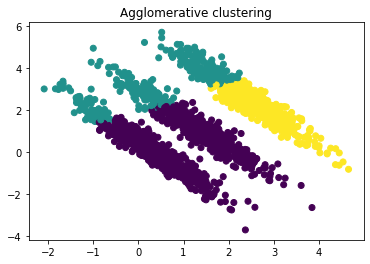

In [4]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=clustering)
plt.title("Agglomerative clustering")
plt.show()

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm1 = confusion_matrix(y, y)
cm2 = confusion_matrix(clustering, y)

print (cm1)
print (cm2)

[[647   0   0]
 [  0 692   0]
 [  0   0 661]]
[[  4 669 471]
 [178   0 190]
 [465  23   0]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Agglomerative')

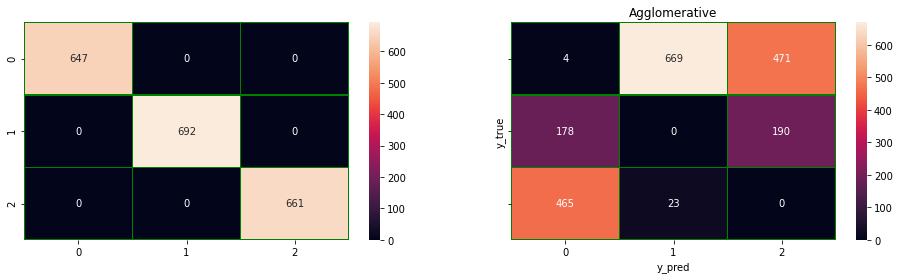

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm1 = confusion_matrix(y, y)
cm2 = confusion_matrix(clustering, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 4),sharey=True)

sns.heatmap(cm1,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[0])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('Kmeans')

sns.heatmap(cm2,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[1])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('Agglomerative')